# Machine Learning Models for Math Scores
### Courtney Drysdale - MSDS 692 - 2025 Fall 8W1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("2025_data_cleaned.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   District Code                  161 non-null    int64  
 1   District Name                  161 non-null    object 
 2   ELA                            161 non-null    float64
 3   Math                           161 non-null    float64
 4   Attendance Rate                161 non-null    float64
 5   Truancy Rate                   161 non-null    float64
 6   PK-12 Count                    161 non-null    int64  
 7   Teacher FTE                    161 non-null    float64
 8   Percent Minority               161 non-null    float64
 9   Percent Female                 161 non-null    float64
 10  Percent Male                   161 non-null    float64
 11  Percent Non-Binary             161 non-null    float64
 12  Average Teacher Salary         161 non-null    flo

In [4]:
df.head()

,District Code,District Name,ELA,Math,Attendance Rate,Truancy Rate,PK-12 Count,Teacher FTE,Percent Minority,Percent Female,Percent Male,Percent Non-Binary,Average Teacher Salary,Percent Teacher Minority,Staff Turnover Rate,Federal Funding Per Pupil,State/Local Funding Per Pupil,Student Teacher Ratio,Total Funding Per Pupil
0,10,Mapleton 1,23.9,17.0,0.905,0.050,7095,404.6,0.875,0.499,0.501,0.0000,84216.0,0.224638,0.1961,525.0,14362.0,17.535838,14887.0
1,20,Adams 12 Five Star Schools,42.2,34.2,0.900,0.050,34466,2019.5,0.608,0.484,0.515,0.0008,78778.0,0.141951,0.1836,1008.0,14877.0,17.066601,15885.0
2,30,Adams County 14,12.9,8.6,0.879,0.091,5221,318.9,0.924,0.466,0.534,0.0000,77089.0,0.469697,0.2577,1988.0,15753.0,16.371903,17741.0
3,40,School District 27J,32.4,25.2,0.914,0.038,24014,1231.0,0.635,0.486,0.514,0.0001,76638.0,0.163282,0.1863,440.0,10788.0,19.507717,11228.0
4,50,Bennett 29J,27.7,17.6,0.924,0.028,1793,91.0,0.619,0.481,0.519,0.0000,53818.0,0.161290,0.3415,481.0,13661.0,19.703297,14142.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
District Code,161.0,1747.459627,1252.930260,10.000000,940.000000,1540.000000,2650.000000,9170.000000
ELA,161.0,38.351553,13.738946,10.400000,28.600000,36.500000,47.500000,70.000000
Math,161.0,28.334783,12.656610,4.900000,18.400000,27.300000,35.800000,69.800000
Attendance Rate,161.0,0.918161,0.042621,0.441000,0.909000,0.920000,0.935000,0.986000
Truancy Rate,161.0,0.025534,0.018745,0.000000,0.014000,0.021000,0.031000,0.098000
PK-12 Count,161.0,5449.291925,12942.261207,47.000000,277.000000,769.000000,3195.000000,90450.000000
Teacher FTE,161.0,330.100621,788.772536,5.700000,21.500000,53.200000,194.500000,6047.000000
Percent Minority,161.0,0.394335,0.218994,0.081000,0.217000,0.337000,0.552000,0.924000
Percent Female,161.0,0.483863,0.024064,0.412000,0.472000,0.484000,0.496000,0.553000
Percent Male,161.0,0.515950,0.024151,0.447000,0.504000,0.515000,0.528000,0.588000


Now I will make a new column that has a value for whether or not the district's score was at or above the average or below the average score for the state. The mean for Math score is 28.334783, so that will be the threshold. The machine learning algorithm will predict whether or not a district's overall scores will be below or at or above average.

In [6]:
mean = 28.334783
df['Math Score'] = np.where(df['Math'] > mean, 1, 0)

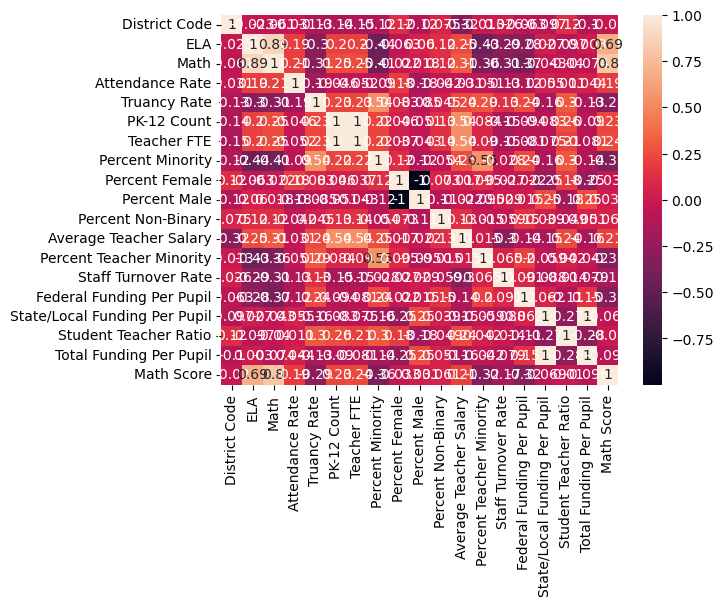

In [10]:
_ = sns.heatmap(df.corr(), annot=True)

In [11]:
df = df.drop(columns = ['District Code', 'District Name', 'ELA', 'Math', 'PK-12 Count',
                       'Teacher FTE', 'Percent Female', 'Percent Non-Binary'], axis = 1)

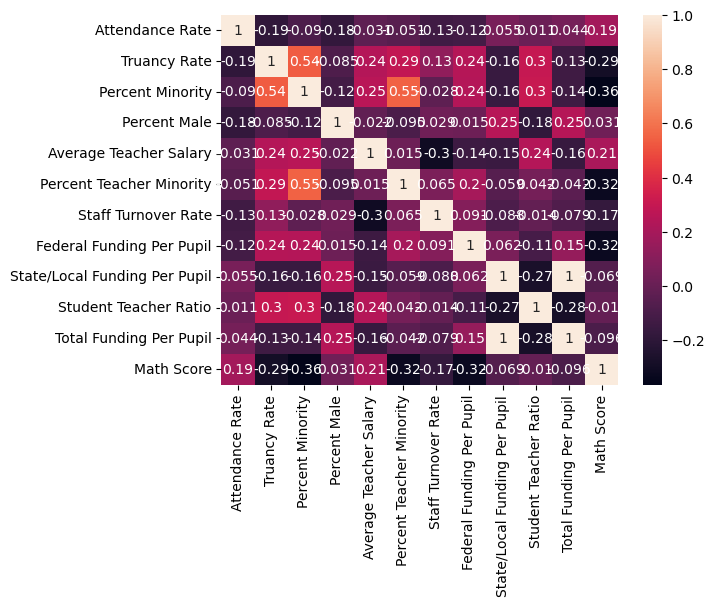

In [12]:
_ = sns.heatmap(df.corr(), annot=True)

First I'll try a decision tree model to see how it does.

## Decision Tree

In [13]:
cols = df.columns

prediction_col = 'Math Score'
feature_cols = [c for c in cols if c != prediction_col]

x = df[feature_cols].values
y = df[prediction_col].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

preds_tree = tree_model.predict(x_test)

In [15]:
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds_tree)

Actuals for test data set
[0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0]
Predictions for test data set
[0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1]


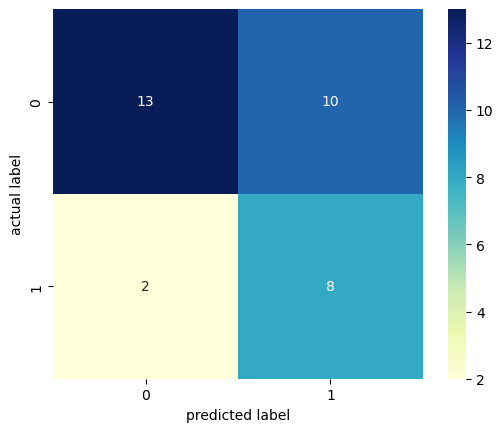

In [16]:
cm = confusion_matrix(y_test, preds_tree)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

In [17]:
print(accuracy_score(y_test,preds_tree))

0.6363636363636364


In [18]:
print(roc_auc_score(y_test, preds_tree))

0.682608695652174


In [19]:
importance_list = list(zip(feature_cols,tree_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature

[('Percent Minority', 0.3602164109409009),
 ('Percent Teacher Minority', 0.18159195302052442),
 ('Staff Turnover Rate', 0.12134598828785279),
 ('Percent Male', 0.10241550724256539),
 ('Average Teacher Salary', 0.06510549279780048),
 ('Attendance Rate', 0.059794607857735514),
 ('Federal Funding Per Pupil', 0.0427523730749537),
 ('Student Teacher Ratio', 0.028131868131868135),
 ('Truancy Rate', 0.02301698301698301),
 ('State/Local Funding Per Pupil', 0.01562881562881563),
 ('Total Funding Per Pupil', 0.0)]

Looks like some of these don't help at all, so I could take them out.

Next, I will try a random forest model.

## Random Forest

In [20]:
forest_model = RandomForestClassifier(n_jobs = -1, random_state=42)
forest_model.fit(x_train,y_train)

forest_preds = forest_model.predict(x_test)

In [21]:
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(forest_preds)

Actuals for test data set
[0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0]
Predictions for test data set
[0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]


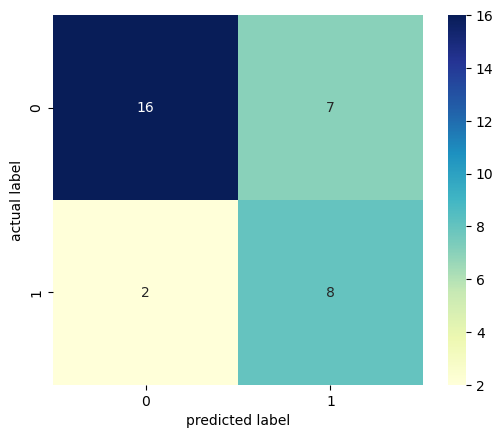

In [22]:
cm = confusion_matrix(y_test, forest_preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

In [23]:
print(accuracy_score(y_test,forest_preds))

0.7272727272727273


In [24]:
print(roc_auc_score(y_test, forest_preds))

0.7478260869565219


In [25]:
importance_list = list(zip(feature_cols,forest_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature

[('Percent Minority', 0.17416896063932266),
 ('Federal Funding Per Pupil', 0.10989814626318656),
 ('Average Teacher Salary', 0.10927378618149498),
 ('Staff Turnover Rate', 0.10852064823848741),
 ('Truancy Rate', 0.09809756756882226),
 ('Percent Teacher Minority', 0.07992510449856288),
 ('Attendance Rate', 0.07417636724356876),
 ('State/Local Funding Per Pupil', 0.06983415205888431),
 ('Percent Male', 0.06539111517146363),
 ('Total Funding Per Pupil', 0.05889312412392464),
 ('Student Teacher Ratio', 0.05182102801228186)]

This performed slightly better.

## Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)
preds_nb = model_nb.predict(x_test)

In [28]:
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds_nb)

Actuals for test data set
[0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0]
Predictions for test data set
[1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1]


In [29]:
print(accuracy_score(y_test,preds_nb))

0.45454545454545453


In [30]:
print(roc_auc_score(y_test, preds_nb))

0.5521739130434783


In [31]:
print(classification_report(y_test, preds_nb))

              precision    recall  f1-score   support

           0       0.78      0.30      0.44        23
           1       0.33      0.80      0.47        10

    accuracy                           0.45        33
   macro avg       0.56      0.55      0.45        33
weighted avg       0.64      0.45      0.45        33



## Logistic Regression

Again, I'll scale the data for the other models since they need it, with the StandardScaler.

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(x_train)

StandardScaler()

In [35]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

preds_lr = model_lr.predict(x_test)

In [37]:
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds_lr)

Actuals for test data set
[0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0]
Predictions for test data set
[0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0]


In [38]:
print(accuracy_score(y_test,preds_lr))

0.7272727272727273


In [40]:
print(roc_auc_score(y_test, preds_lr))

0.7195652173913043


In [41]:
print(classification_report(y_test, preds_lr))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.54      0.70      0.61        10

    accuracy                           0.73        33
   macro avg       0.69      0.72      0.70        33
weighted avg       0.76      0.73      0.74        33



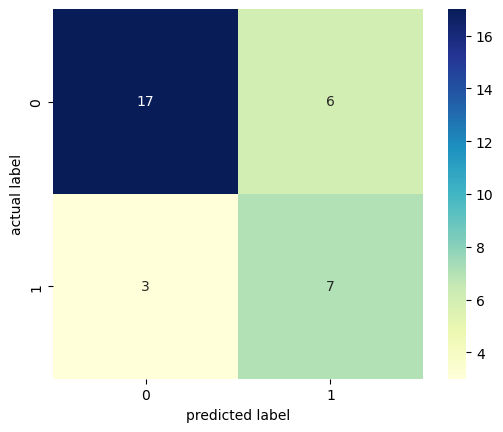

In [60]:
cm_lr = confusion_matrix(y_test, preds_lr)
target_labels = np.unique(y_test)

sns.heatmap(cm_lr, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

In [42]:
coef_dict = dict(zip(feature_cols, model_lr.coef_.flatten()))

In [43]:
coef_dict

{'Attendance Rate': 0.10930772390601516,
 'Truancy Rate': -0.25356664238443705,
 'Percent Minority': -0.6719192564040728,
 'Percent Male': 0.0965278879394538,
 'Average Teacher Salary': 0.5985956772452278,
 'Percent Teacher Minority': -0.260657261349843,
 'Staff Turnover Rate': -0.3484637014219113,
 'Federal Funding Per Pupil': -0.5026278850875155,
 'State/Local Funding Per Pupil': -0.15446907163492118,
 'Student Teacher Ratio': -0.13228234120074428,
 'Total Funding Per Pupil': -0.19363669912668818}

After scaling the data, this performed more on par with the ELA scores, though not as good.

## Neural Network

In [44]:
from sklearn.neural_network import MLPClassifier  

mlp = MLPClassifier(hidden_layer_sizes=(30, 100, 10, 40), max_iter=1000)  
mlp.fit(x_train, y_train)  

MLPClassifier(hidden_layer_sizes=(30, 100, 10, 40), max_iter=1000)

In [45]:
preds_nn = mlp.predict(x_test)

In [48]:
print(preds_nn)

[0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1]


In [49]:
print(accuracy_score(y_test,preds_nn))

0.6060606060606061


In [50]:
print(roc_auc_score(y_test, preds_nn))

0.6891304347826087


In [51]:
print(confusion_matrix(y_test,preds_nn))  
print(classification_report(y_test,preds_nn))  

[[11 12]
 [ 1  9]]
              precision    recall  f1-score   support

           0       0.92      0.48      0.63        23
           1       0.43      0.90      0.58        10

    accuracy                           0.61        33
   macro avg       0.67      0.69      0.60        33
weighted avg       0.77      0.61      0.61        33



## K Nearest Neighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
model_knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [54]:
preds_knn = model_knn.predict(x_test)

print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds_knn)

Actuals for test data set
[0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0]
Predictions for test data set
[0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0]


In [55]:
print(accuracy_score(y_test,preds_knn))

0.6666666666666666


In [56]:
print(roc_auc_score(y_test, preds_knn))

0.7043478260869566


In [57]:
print(confusion_matrix(y_test,preds_knn))  
print(classification_report(y_test,preds_knn))  

[[14  9]
 [ 2  8]]
              precision    recall  f1-score   support

           0       0.88      0.61      0.72        23
           1       0.47      0.80      0.59        10

    accuracy                           0.67        33
   macro avg       0.67      0.70      0.66        33
weighted avg       0.75      0.67      0.68        33



## Math Scores Conclusion

Overall on the math scores, the logistic regression and random forest models performed the best out of the bunch and had the same accuracy score (0.7273), though random forest had a slightly better auc_roc score (0.7195 vs. 0.7478). I'll look at conclusions of both and see if there is any crossover for different areas districts could focus.

#### Random Forest Importance List
- Percent Minority: 0.1742
- Federal Funding Per Pupil: 0.1099
- Average Teacher Salary: 0.1092
- Staff Turnover Rate: 0.1085

#### Logistic Regression Coefficient Magnitudes
- Percent Minority: -0.6719
- Average Teacher Salary: 0.5985
- Staff Turnover Rate: -0.3484
- Federal Funding Per Pupil: -0.5026

While they are in different orders, the same four features impacted both models the most. These are also the same ones that informed the ELA score models, so the same type of interventions and efforts could potentially help with both types of scores.